In [4]:
import h5py
import numpy as np
import os
from sklearn.model_selection import train_test_split

# import the feature vector and trained labels
h5f_data = h5py.File('output/data.h5', 'r')
h5f_label = h5py.File('output/labels.h5', 'r')

X_string = h5f_data['dataset_1']
y_string = h5f_label['dataset_1']

X = np.array(X_string)
X = np.reshape(X,(800,30,30))
y = np.array(y_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print ("[STATUS] features shape: {}".format(X.shape))
print ("[STATUS] labels shape: {}".format(y.shape))

print ("[STATUS] training started...")

[STATUS] features shape: (800, 30, 30)
[STATUS] labels shape: (800,)
[STATUS] training started...


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## One hot encoding using sklearn

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [8]:
# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, onehot_encoded, test_size=0.1, random_state=42)
print ("[STATUS] splitted train and test data...")
print ("Train data  : {}".format(X_train.shape))
print ("Test data   : {}".format(X_test.shape))
print ("Train labels: {}".format(y_train.shape))
print ("Test labels : {}".format(y_test.shape))

[STATUS] splitted train and test data...
Train data  : (720, 30, 30)
Test data   : (80, 30, 30)
Train labels: (720, 2)
Test labels : (80, 2)


In [9]:
X_train.shape

(720, 30, 30)

In [10]:
y_train.shape

(720, 2)

In [12]:
shaped_X = np.reshape(X_train,(720,30,30,1))

In [13]:
shaped_X_t = np.reshape(X_test,(80,30,30,1))

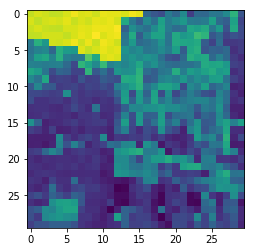

In [14]:
plt.imshow(np.reshape(X_train[1],(30,30)))

In [15]:
import tensorflow as tf

In [16]:
X = tf.placeholder(tf.float32,[None,30,30,1])
y_true = tf.placeholder(tf.int32,[None,2])

In [17]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [36]:
conv_1 = convolutional_layer(X,shape=[6,6,1,10])
conv_1_pooling = max_pool_2by2(conv_1)

In [37]:
conv_2 = convolutional_layer(conv_1_pooling,shape=[6,6,10,20])
conv_2_pooling = max_pool_2by2(conv_2)


In [38]:
conv_3 = convolutional_layer(conv_2_pooling,shape=[6,6,20,5])
pooled = max_pool_2by2(conv_3)

In [39]:
pooled.shape

TensorShape([Dimension(None), Dimension(4), Dimension(4), Dimension(5)])

In [40]:
flattened = tf.reshape(pooled,shape=(-1,80))

In [41]:
flattened.shape

TensorShape([Dimension(None), Dimension(80)])

In [42]:
full_layer_one = tf.nn.relu(normal_full_layer(flattened,80))

In [43]:
full_layer_one.shape

TensorShape([Dimension(None), Dimension(80)])

In [44]:
hold_prob = tf.placeholder(tf.float32)

In [45]:
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [46]:
y_pred = normal_full_layer(full_one_dropout,2)

In [47]:
y_pred.shape

TensorShape([Dimension(None), Dimension(2)])

In [48]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [49]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [50]:
init = tf.global_variables_initializer()

# execution of training using CNN, need to train for at least 1000 steps to reach 75% accuracy

In [51]:
steps = 10
with tf.Session() as sess:
    sess.run(init)
    for i in range (steps):
        sess.run(train,feed_dict={X:shaped_X,y_true:y_train,hold_prob:0.5})
             
        if i%2 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={X:shaped_X_t,y_true:y_test,hold_prob:1.0}))
            print('\n')
            
            
    
    
    

Currently on step 0
Accuracy is:
0.4625


Currently on step 2
Accuracy is:
0.5125


Currently on step 4
Accuracy is:
0.5125


Currently on step 6
Accuracy is:
0.5375


Currently on step 8
Accuracy is:
0.4875


